In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set_style('white')
import corner 
from scipy.interpolate import CubicSpline as spline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from prob2d_mine import get_prob2d1

In [3]:
from read_mock import read_mock

Cosmology/HMF code is required.
SHMR code is required.


THIS IS THE MODEL!!!!

In [4]:
def exp_Mh_split(theta, use_red):
    
    prob2_sp, probm_sp, probh_sp = get_prob2d1(theta, use_red)
    
    #int_sp = np.trapz(prob2_sp, x = probm_sp, axis=0)
    #norm_sp = np.trapz(int_sp, x=probh_sp)
    #print np.abs(norm_sp - 1.0) > 1e-5
    
    p_ms_sp = np.trapz(prob2_sp, probh_sp, axis=-1)
    #print np.trapz(p_ms_sp,probm_sp)
    
    joint_sp = []
    for i in range(len(probm_sp)):
        joint_sp.append(prob2_sp[i,:] / p_ms_sp[i])

    
    joint_sp = np.array(joint_sp)
    
    for j in range(len(probm_sp)):
        norm2s = np.trapz(joint_sp[j,:],probh_sp)
        #if np.abs(norm2s - 1.) > 1e-5:
        #print 'error'
    
    exp_sp = []
    for k in range(len(probm_sp)):
        exp_sp.append(np.trapz(joint_sp[k,:]*probh_sp, probh_sp))
    exp_sp = np.array(exp_sp)
    lgexp = (exp_sp/np.log(10.)) + np.log10(0.7)
    lgprobm = probm_sp / np.log(10.)
    
    return lgprobm, lgexp 


In [5]:
mock = '/Users/Oleg/Documents/macss2017_quenching/data/iHODcatalog_bolshoi.h5'

In [6]:
def isred1(log_smass, gcolor1):
    cut = 0.8*(log_smass/10.5)**0.6
    isred2 = gcolor1 >= cut
    return(isred2)

In [7]:
def comp_splot(use_red):
    galrec = read_mock(mock)
    iscen = galrec['lg_halo_mass'] > 1
    lgmh1 = galrec['lg_halo_mass'][iscen]
    lgms1 = galrec['lg_stellar_mass'][iscen]
    gcolor1 = galrec['g-r'][iscen]
    isred_m = isred1(lgms1, gcolor1)
    # check which of them are red vs blue
    if use_red:
        colsel = isred_m
        xlabel = r"$M_*^{\mathrm{red}}\;[M_\odot/h^2]$"
        color = 'r'
        label = 'Mock Red Data'
        _label = 'Predicted Red'
    else:
        colsel = ~isred_m
        xlabel = r"$M_*^{\mathrm{blue}}\;[M_\odot/h^2]$"
        color = 'b'
        label = 'Mock Blue Data'
        _label = 'Predicted Blue'
    # prediction!
    #model
    #lgMs_arr, lgMh_mean_arr = exp_Mh_split(theta, use_red)
    #plt.plot(lgMs_arr, lgMh_mean_arr, color=color, label=_label)
    # select red or blue centrals
    lgmh1 = lgmh1[colsel]
    lgms1 = lgms1[colsel]
    # do measurements in the same way
    lgms_bins = np.linspace(9.5, 11., 122)
    lgms_cens = (lgms_bins[1:] + lgms_bins[:-1]) * 0.5
    lgmh_cens = np.zeros_like(lgms_cens)
    lgmh_errs = np.zeros_like(lgms_cens)
    for i in xrange(lgms_cens.size):
        sel = (lgms1 >= lgms_bins[i]) & (lgms1 < lgms_bins[i+1])
        nsel = np.sum(sel)
        if nsel > 5:
            # update lgms_cens
            lgms_cens[i] = np.mean(lgms1[sel])
            lgmh_cens[i] = np.mean(lgmh1[sel])
            lgmh_errs[i] = np.std(lgmh1[sel]) / np.sqrt(float(nsel))
    return lgms_cens, lgmh_cens, lgmh_errs

In [8]:
pred_ms, pred_mh = exp_Mh_split((12.,0.3),use_red=False)
data_ms, data_mh, data_err = comp_splot(use_red=False)

galaxy
[('conc', 'float64'), ('g-r', 'float64'), ('halo_id', 'int64'), ('lg_halo_mass', 'float64'), ('lg_stellar_mass', 'float64'), ('x', 'float64'), ('y', 'float64'), ('z', 'float64'), ('z_rs', 'float64')]
The data columns are: 
('conc', 'g-r', 'halo_id', 'lg_halo_mass', 'lg_stellar_mass', 'x', 'y', 'z', 'z_rs')


In [9]:
pred_ms1, pred_mh1 = exp_Mh_split((13.,0.8),use_red=False)

In [10]:
print pred_mh1 == pred_mh

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]


In [11]:
pred_ms_r, pred_mh_r = exp_Mh_split((12.,0.3),use_red=True)
data_msr, data_mhr, data_errr = comp_splot(use_red=True)

galaxy
[('conc', 'float64'), ('g-r', 'float64'), ('halo_id', 'int64'), ('lg_halo_mass', 'float64'), ('lg_stellar_mass', 'float64'), ('x', 'float64'), ('y', 'float64'), ('z', 'float64'), ('z_rs', 'float64')]
The data columns are: 
('conc', 'g-r', 'halo_id', 'lg_halo_mass', 'lg_stellar_mass', 'x', 'y', 'z', 'z_rs')


In [12]:
data_msr == pred_ms_r

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False], dtype=bool)

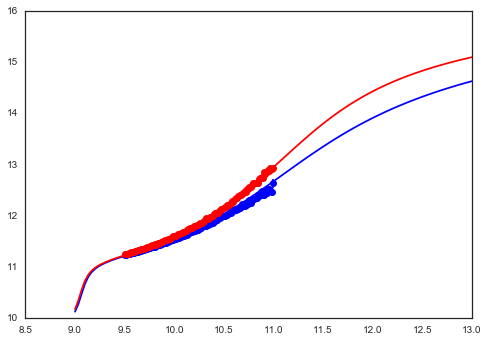

In [13]:
plt.figure()
plt.plot(pred_ms,pred_mh,'b');
plt.errorbar(data_ms,data_mh,yerr=data_err,fmt='o',color='b');
plt.plot(pred_ms_r,pred_mh_r,'r');
plt.errorbar(data_msr,data_mhr,yerr=data_errr,fmt='o',color='r');

do only for the mh data

In [14]:
M_s_inter = np.linspace(9,13,len(pred_mh))

In [15]:
Mh_funct = spline(M_s_inter,pred_mh)

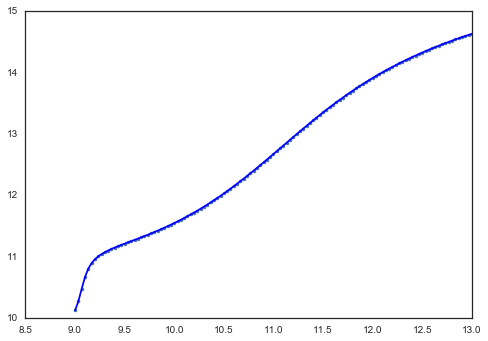

In [20]:
plt.plot(pred_ms, Mh_funct(pred_ms),'.');
plt.plot(pred_ms,pred_mh,'b');

In [21]:
def exp_Mh_split2(theta,data_SM, use_red):
    
    prob2_sp, probm_sp, probh_sp = get_prob2d1(theta, use_red)
    
    #int_sp = np.trapz(prob2_sp, x = probm_sp, axis=0)
    #norm_sp = np.trapz(int_sp, x=probh_sp)
    #print np.abs(norm_sp - 1.0) > 1e-5
    
    p_ms_sp = np.trapz(prob2_sp, probh_sp, axis=-1)
    #print np.trapz(p_ms_sp,probm_sp)
    
    joint_sp = []
    for i in range(len(probm_sp)):
        joint_sp.append(prob2_sp[i,:] / p_ms_sp[i])

    
    joint_sp = np.array(joint_sp)
    
    for j in range(len(probm_sp)):
        norm2s = np.trapz(joint_sp[j,:],probh_sp)
        #if np.abs(norm2s - 1.) > 1e-5:
        #print 'error'
    
    exp_sp = []
    for k in range(len(probm_sp)):
        exp_sp.append(np.trapz(joint_sp[k,:]*probh_sp, probh_sp))
    exp_sp = np.array(exp_sp)
    lgexp = (exp_sp/np.log(10.)) + np.log10(0.7)
    lgprobm = probm_sp / np.log(10.)
    
    SM = np.linspace(9,11,len(lgexp))
    spl_fun = spline(lgprobm,lgexp)
    Mh_slp = spl_fun(data_SM)
    #return lgprobm, lgexp 
    return Mh_slp

In [26]:
Halo_mass = exp_Mh_split2((12.,0.5),data_ms, use_red=False)
Halo_mass1 = exp_Mh_split2((12.,0.8),data_ms, use_red=False)

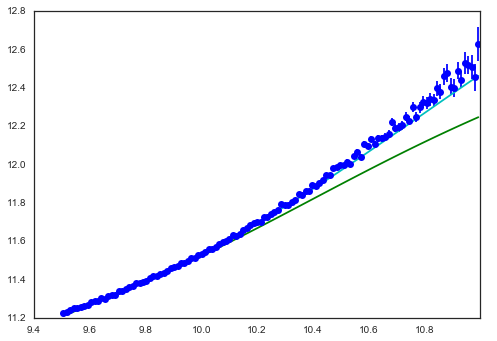

In [27]:
plt.plot(data_ms, Halo_mass,'c');
plt.plot(data_ms, Halo_mass1,'g');
#plt.plot(pred_ms,pred_mh,'g');
plt.errorbar(data_ms,data_mh,yerr=data_err,fmt='o',color='b');

# Chains with flat prior

In [29]:
chains = np.loadtxt('chains1.txt')

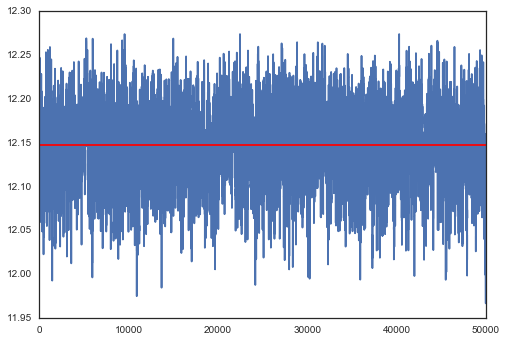

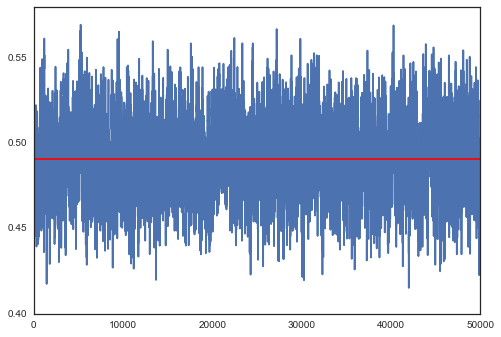

In [37]:
plt.figure()
plt.plot(chains[50000:,0]);
plt.axhline(chains[50000:,0].mean(),color='r');
plt.figure()
plt.plot(chains[50000:,1]);
plt.axhline(chains[50000:,1].mean(),color='r');

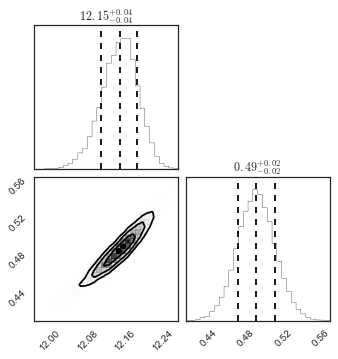

In [43]:
corner.corner(chains,bins=30,plot_datapoints=False,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True);

In [39]:
chains = chains[50000:,:]

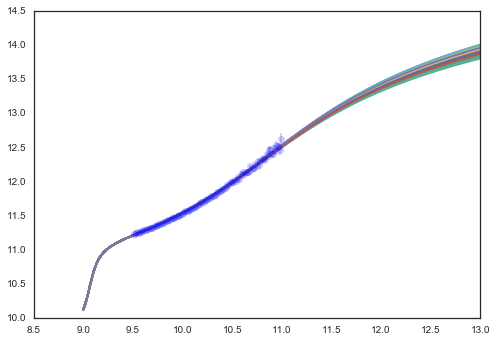

In [58]:
for m,c in chains[np.random.randint(len(chains), size=100)]:
    Ste_massi, Halo_massi = exp_Mh_split((m,c),use_red=False)
    plt.plot(Ste_massi, Halo_massi);
plt.errorbar(data_ms,data_mh,yerr=data_err,fmt='o',color='b',alpha=0.2);

In [44]:
chains1 = np.loadtxt('chains.txt')

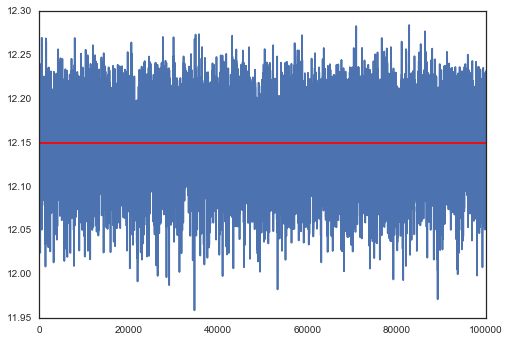

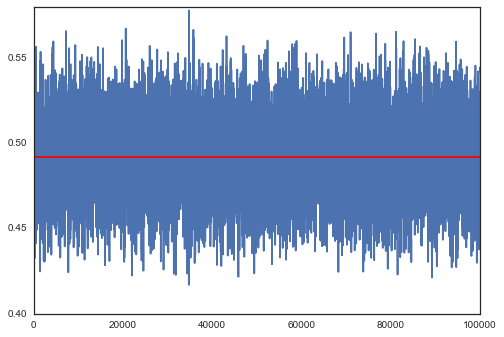

In [46]:
plt.figure()
plt.plot(chains1[:,0]);
plt.axhline(chains1[:,0].mean(),color='r');
plt.figure()
plt.plot(chains1[:,1]);
plt.axhline(chains1[:,1].mean(),color='r');

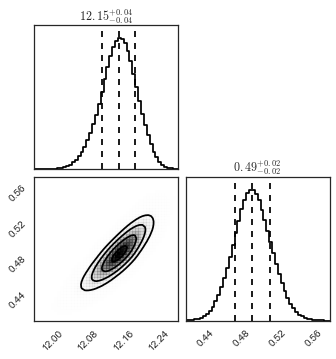

In [52]:
corner.corner(chains1,bins=50,plot_datapoints=False,smooth=2.,smooth1d=2., quantiles=[0.16, 0.5, 0.84],
                       show_titles=True);

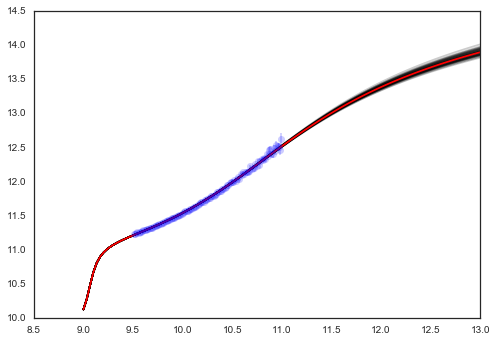

In [60]:
for m,c in chains1[np.random.randint(len(chains1), size=50)]:
    Ste_massj,Halo_massj = exp_Mh_split((m,c),use_red=False)
    plt.plot(Ste_massj, Halo_massj,color='k',alpha=0.2);
Ste_mean, halo_mean = exp_Mh_split((chains1[:,0].mean(),chains1[:,1].mean()),use_red=False)
plt.plot(Ste_mean,halo_mean,'r')
plt.errorbar(data_ms,data_mh,yerr=data_err,fmt='o',color='b',alpha=0.2);

In [61]:
chains_r = np.loadtxt('chains_r.txt')

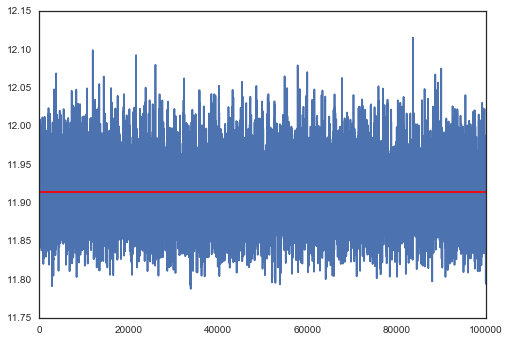

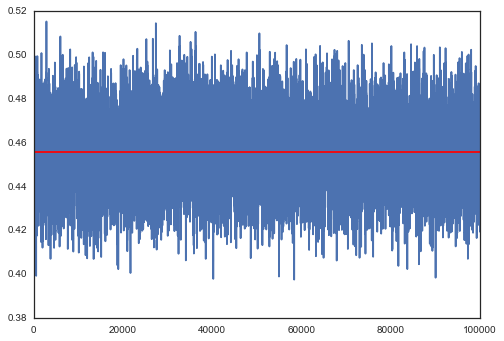

In [63]:
plt.figure()
plt.plot(chains_r[:,0]);
plt.axhline(chains_r[:,0].mean(),color='r');
plt.figure()
plt.plot(chains_r[:,1]);
plt.axhline(chains_r[:,1].mean(),color='r');

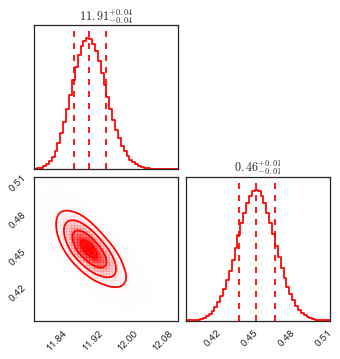

In [64]:
corner.corner(chains_r,bins=50,plot_datapoints=False,color='r',smooth=2.,smooth1d=2., quantiles=[0.16, 0.5, 0.84],
                       show_titles=True);

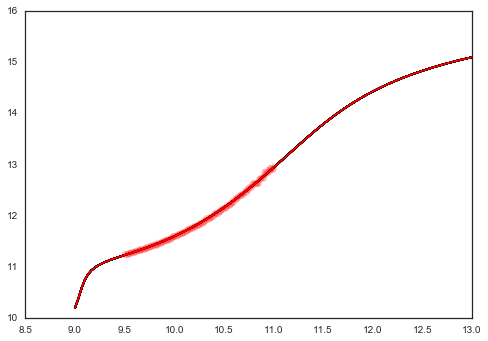

In [68]:
for m,c in chains_r[np.random.randint(len(chains_r), size=100)]:
    Ste_massr,Halo_massr = exp_Mh_split((m,c),use_red=True)
    plt.plot(Ste_massr, Halo_massr,color='k',alpha=0.2);
Ste_meanr, halo_meanr = exp_Mh_split((chains_r[:,0].mean(),chains_r[:,1].mean()),use_red=True)
plt.plot(Ste_meanr,halo_meanr,'r')
plt.errorbar(data_msr,data_mhr,yerr=data_err,fmt='o',color='r',alpha=0.2);

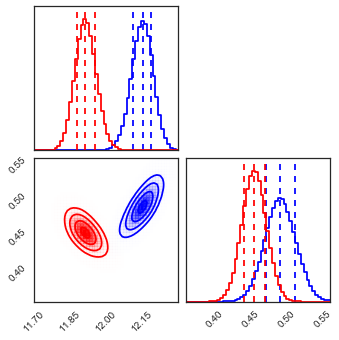

In [75]:
plt.figure()
fig1 = corner.corner(chains1,bins=50,color='b',range=[(11.7,12.3),(0.36,0.56)],plot_datapoints=False,smooth=2.,smooth1d=2., quantiles=[0.16, 0.5, 0.84]);
fi2 = corner.corner(chains_r,bins=50,color='r',range=[(11.7,12.3),(0.36,0.56)],plot_datapoints=False,smooth=2.,smooth1d=2., quantiles=[0.16, 0.5, 0.84]
                    ,fig=fig1);

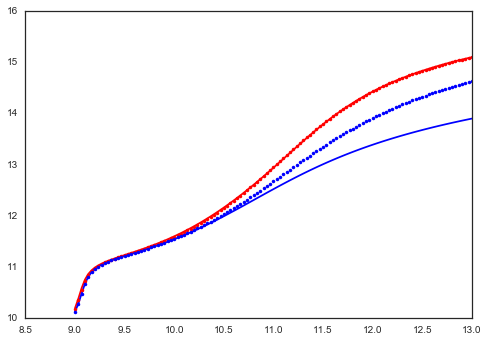

In [70]:
plt.plot(Ste_meanr,halo_meanr,'r');
plt.plot(Ste_mean,halo_mean,'b');
plt.plot(pred_ms_r,pred_mh_r,'.r');
plt.plot(pred_ms,pred_mh,'.b');